In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [7]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

### Education Type w.r.t Income Type

In [7]:
a = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['TotalCount'] = a_level1['SK_ID_CURR']
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a.drop(['SK_ID_CURR'],axis=1,inplace=True)
# a = a.rename(columns={'SK_ID_CURR':'COUNTwrtTarget'})
a = a.unstack().drop([('Defaulter_rates', 0),('TotalCount', 0)],axis=1).fillna(0).stack()
a = a.reset_index(level=-1).drop('TARGET',axis=1)
a['Proportions'] = a['TotalCount']/len(application)*100
education_type = a.reset_index()
education_type = education_type.drop(23).reset_index(drop=True)

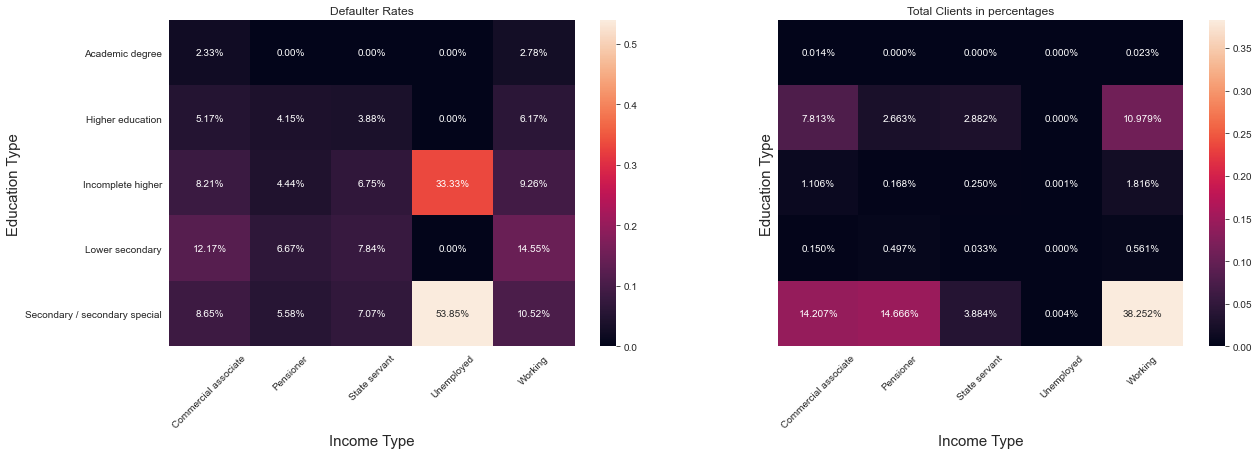

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,6))


sns.heatmap(a['Defaulter_rates'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1)/100
            ,annot=True,fmt=".2%",ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=15)
plt.ylabel('Education Type',size=15)
plt.title('Defaulter Rates')


sns.heatmap(a['Proportions'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1)/100
            ,annot=True,fmt=".3%",ax=ax[1])
plt.sca(ax[1])
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=15)
plt.ylabel('Education Type',size=15)
plt.title('Total Clients in percentages')
plt.show()

## AGE

In [10]:
application['DAYS_BIRTH'] = np.abs(application['DAYS_BIRTH']/365)

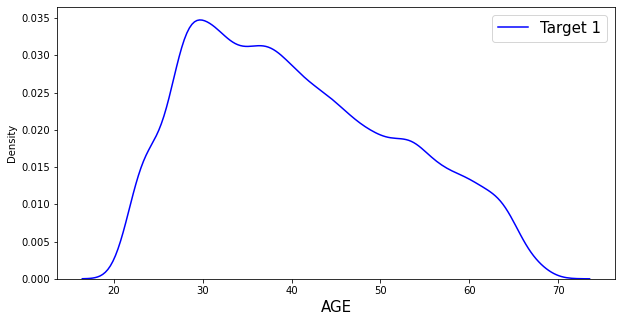

In [48]:
plt.figure(figsize=(10,5))
# sns.kdeplot(application[application['TARGET']==0]['DAYS_BIRTH'],label='Target 0',color='blue')
sns.kdeplot(application[application['TARGET']==1]['DAYS_BIRTH'],label='Target 1',color='blue')
plt.ticklabel_format(style='plain', axis='both')
plt.legend(prop={'size':15})
plt.xlabel('AGE',size=15)
plt.show()

In [47]:
age_bins = [20,30,40,50,60,70]
application['Age_bins'] = pd.cut(application['DAYS_BIRTH'],bins=age_bins,labels=['20-30','30-40','40-50','50-60','60-70'])
#[20,30,40,50,60,70]    [20,25,30,35,40,45,50,55,60,65,70]  ,labels=['20-30','30-40','40-50','50-60','60-70']
a = application.groupby(['Age_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(application)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,Age_bins,TotalCount,Defaulter_rates
0,20-30,14.640,11.457
1,30-40,26.766,9.584
2,40-50,24.890,7.651
3,50-60,22.133,6.130
4,60-70,11.570,4.921


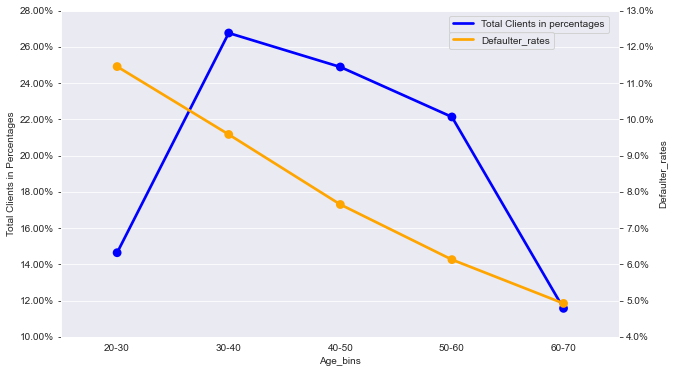

In [48]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='Age_bins',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(10,28))
ax2 = ax1.twinx()


sns.pointplot(x='Age_bins',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(4,13))
ax2.grid(None)

plt.show()

<!-- - 27% of our clients are aged 30-40 with a risk of 9.5%.
- Age group 40-50 don't have the highest number of clients but has a significant drop in default rates at around 7.6% 
- Similary Age group 50-60 has a high number of clients but relatively lower default rate at 6%
- So, we can say that age groups 30-40 and 40-50 are most profitable. -->

- 27% of our clients are aged 30-40 with a risk of 9.5%.
- Age group 40-50 don't have the highest number of clients but still has pretty a high no of clients and has a significantly lower default rate at around 7.6%.
- Similarly Age group 50-60 has a high number of clients but relatively lower default rate at 6%.
- So, we can say that 30-40 and 40-50 are our most profitable age groups.



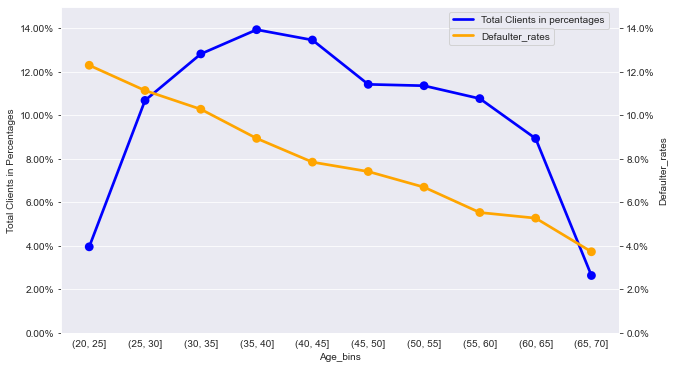

In [43]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='Age_bins',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,15))
ax2 = ax1.twinx()


sns.pointplot(x='Age_bins',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,15))
ax2.grid(None)

plt.show()

## Income Bins

In [7]:
ranges = [25649,60000,100000,150000,200000,250000,117000000]
application['INCOME_BINS'] = pd.cut(application['AMT_INCOME_TOTAL'],bins=ranges,precision=0)
# , labels=['Low','Medium','High' ]

In [50]:
# qbins

application['INCOME_BINS'] = pd.qcut(application['AMT_INCOME_TOTAL'],q=10)

In [64]:
a = application.groupby(['INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(application)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index().sort_values('Defaulter_rates',ascending=False)
a

,INCOME_BINS,TotalCount,Defaulter_rates
4,"(135000.0, 147150.0]",1.409,9.001
2,"(99000.0, 112500.0]",12.002,8.719
5,"(147150.0, 162000.0]",10.120,8.641
3,"(112500.0, 135000.0]",15.885,8.489
6,"(162000.0, 180000.0]",9.985,8.422
1,"(81000.0, 99000.0]",9.847,8.223
0,"(25649.999, 81000.0]",10.858,8.191
7,"(180000.0, 225000.0]",14.572,7.806
8,"(225000.0, 270000.0]",6.490,7.040
9,"(270000.0, 117000000.0]",8.833,6.137


In [95]:
a_level1

,SK_ID_CURR
INCOME_BINS,
"(25649.999, 81000.0]",33391
"(81000.0, 99000.0]",30280
"(99000.0, 112500.0]",36907
"(112500.0, 135000.0]",48849
"(135000.0, 147150.0]",4333
"(147150.0, 162000.0]",31120
"(162000.0, 180000.0]",30704
"(180000.0, 225000.0]",44809
"(225000.0, 270000.0]",19957


In [ ]:
# ['25,649-81,000','81,000-99,000','99,000-1,12,500','1,12,500-1,35,000','1,35,000-1,47,150','1,47,150-1,62,000'
#  ,'1,62,000-1,80,000','1,80,000-2,25,000','2,25,000-2,70,000','2,70,000-11,70,00,000']

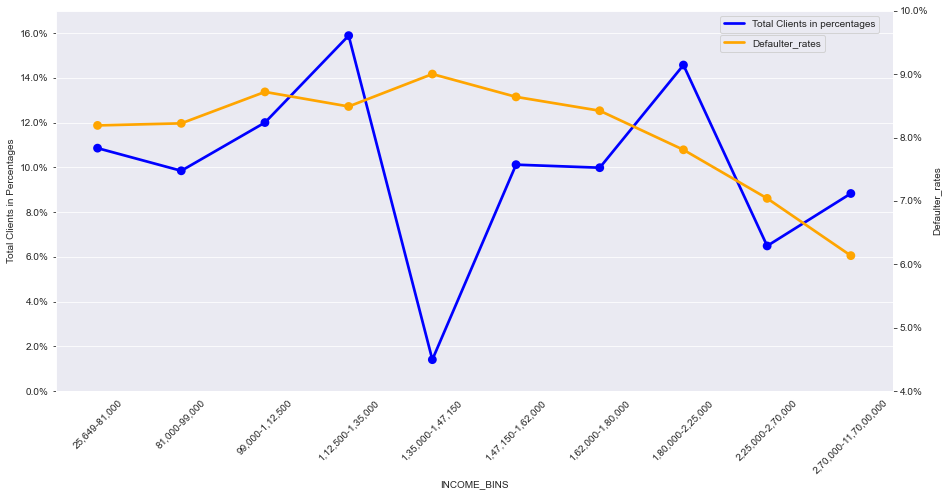

In [94]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,7))


sns.pointplot(x='INCOME_BINS',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set(ylabel='Total Clients in Percentages')
ax1.set(ylim=(0,17))
ax2 = ax1.twinx()


sns.pointplot(x='INCOME_BINS',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9253,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(4,10))
ax1.set_xticklabels(['25,649-81,000','81,000-99,000','99,000-1,12,500','1,12,500-1,35,000','1,35,000-1,47,150'
                     ,'1,47,150-1,62,000','1,62,000-1,80,000','1,80,000-2,25,000','2,25,000-2,70,000'
                     ,'2,70,000-11,70,00,000'],rotation=45)
ax2.grid(None)

plt.show()

| Income Bins 	| Income Range            	| Count    	|
|-------------	|-------------------------	|----------	|
| Low         	|  25,649 - 1,20,000      	| 1,16,259 	|
| Medium      	| 1,20,000 - 2,00,000     	| 1,03,337 	|
| High        	| 2,00,000 - 11,70,00,000 	| 87,915   	|

In [60]:
a = application.groupby(['NAME_CONTRACT_TYPE','REGION_RATING_CLIENT','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(['NAME_CONTRACT_TYPE','REGION_RATING_CLIENT']).sum()
a_default = a/a_level1*100
a["DEFAULTER_RATES"] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

TOTALCOUNT  DEFAULTER_RATES
NAME_CONTRACT_TYPE REGION_RATING_CLIENT                             
Cash loans         1                          9.238            5.108
                   2                         66.933            8.119
                   3                         14.307           11.499
Revolving loans    1                          1.232            2.666
                   2                          6.880            5.653
                   3                          1.409            7.085

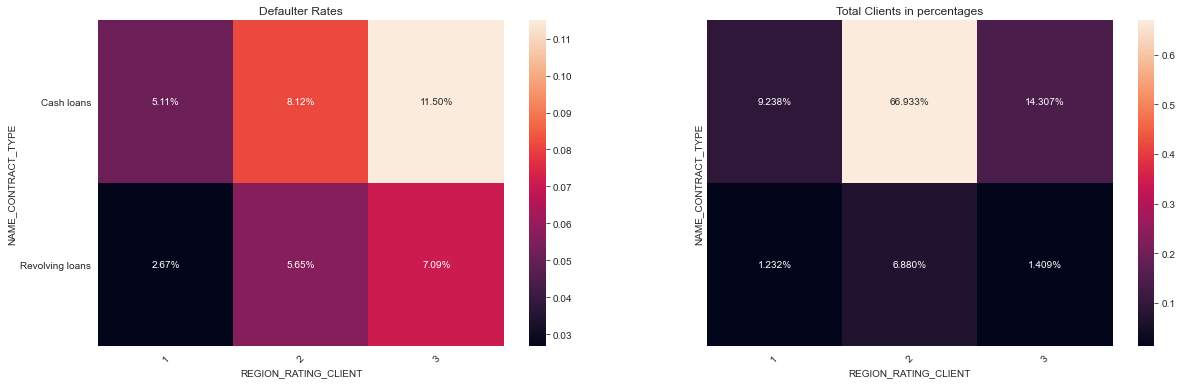

In [62]:
fig,ax = plt.subplots(1,2,figsize=(20,6))


sns.heatmap(a['DEFAULTER_RATES'].unstack().fillna(0)/100
            ,annot=True,fmt=".2%",ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
# plt.xlabel('Income Type',size=12)
plt.title('Defaulter Rates')


sns.heatmap(a['TOTALCOUNT'].unstack().fillna(0)/100
            ,annot=True,fmt=".3%",ax=ax[1])
plt.sca(ax[1])
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
# plt.xlabel('Income Type',size=12)
plt.title('Total Clients in percentages')
plt.show()

### Id with other columns

In [7]:
application['Id_bins'] = pd.qcut(application['SK_ID_CURR'],q=10)
application['Id_bins'].value_counts()

(100001.999, 135692.0]    30752
(420729.0, 456255.0]      30751
(384696.0, 420729.0]      30751
(349428.0, 384696.0]      30751
(313865.0, 349428.0]      30751
(278202.0, 313865.0]      30751
(242626.0, 278202.0]      30751
(207121.0, 242626.0]      30751
(171327.0, 207121.0]      30751
(135692.0, 171327.0]      30751
Name: Id_bins, dtype: int64

In [264]:
plt.plot('Id_bins','COMMONAREA_AVG',data=application.fillna('Null'),marker='o-')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\manda\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-264-00f7c250acbc>", line 1, in <module>
    plt.plot('Id_bins','COMMONAREA_AVG',data=application.fillna('Null'),marker='o-')
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\frame.py", line 4323, in fillna
    downcast=downcast,
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\generic.py", line 6079, in fillna
    value=value, limit=limit, inplace=inplace, downcast=downcast
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\internals\managers.py", line 586, in fillna
    "fillna", value=value, limit=limit, inplace=inplace, downcast=downcast
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\internals\managers.py", line 406, in apply
    applied = getattr(b, f)(**kwargs)
  File "C:\Users\manda\Miniconda3\lib\site-

TypeError: object of type 'NoneType' has no len()

In [266]:
application['COMMONAREA_AVG'].describe()

count   92,646.000
mean         0.045
std          0.076
min          0.000
25%          0.008
50%          0.021
75%          0.051
max          1.000
Name: COMMONAREA_AVG, dtype: float64

In [273]:
application['COMMONAREA_AVG'].fillna()

0         False
1         False
2          True
3          True
4          True
          ...  
307506    False
307507    False
307508    False
307509     True
307510    False
Name: COMMONAREA_AVG, Length: 307511, dtype: bool

### https://towardsdatascience.com/visualizing-the-nothing-ae6daccc9197

In [275]:
import missingno as msno

<AxesSubplot:>

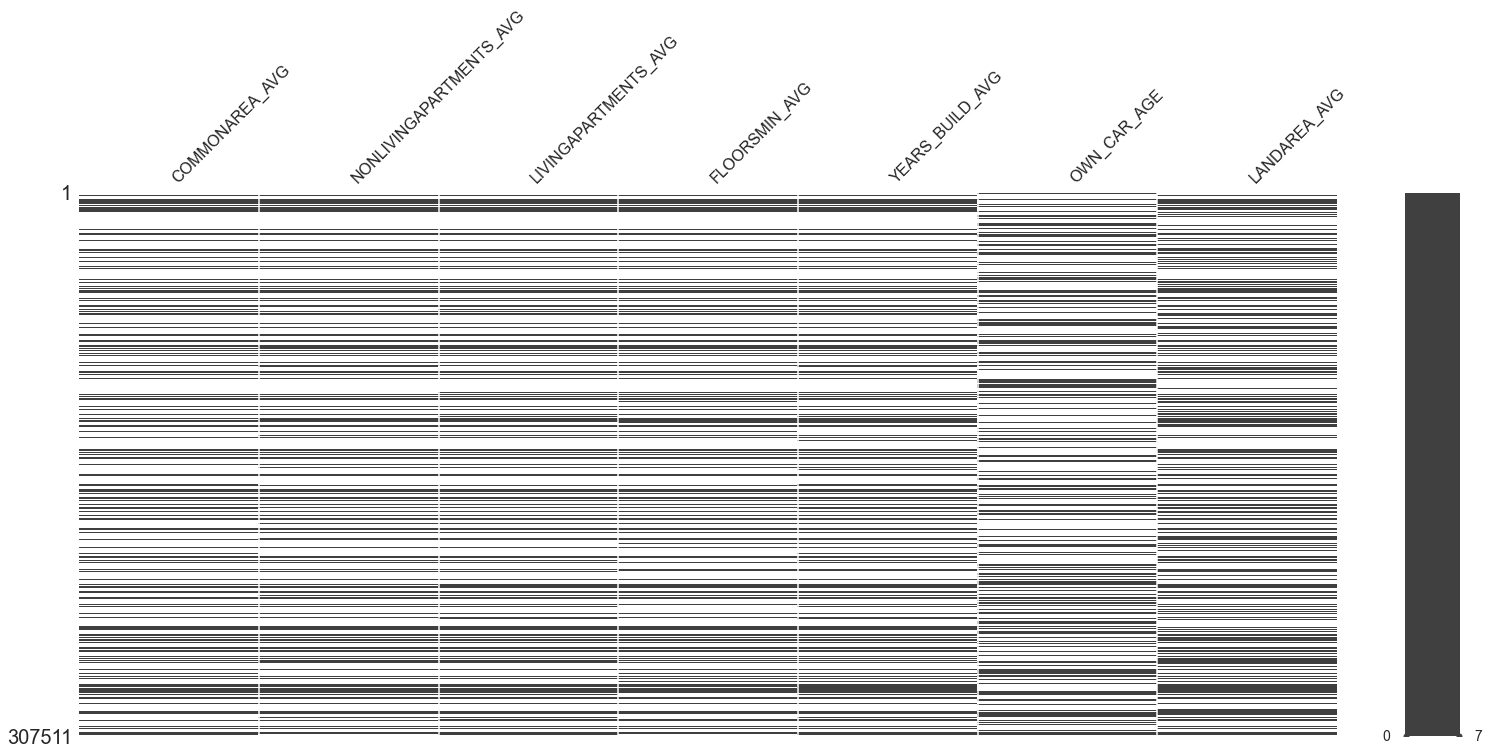

In [284]:
msno.matrix(application[['COMMONAREA_AVG','NONLIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_AVG','FLOORSMIN_AVG',
                        'YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_AVG']])

In [292]:
application['YEARS_EMPLOYED'] = np.abs(application['DAYS_EMPLOYED'])/365
application['YEARS_EMPLOYED']

0            1.745
1            3.255
2            0.616
3            8.326
4            8.323
            ...   
307506       0.647
307507   1,000.666
307508      21.701
307509      13.112
307510       3.458
Name: YEARS_EMPLOYED, Length: 307511, dtype: float64

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

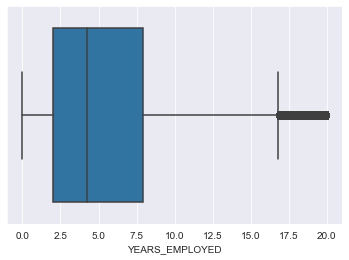

In [318]:
sns.boxplot(application[application['YEARS_EMPLOYED']<20]['YEARS_EMPLOYED'])

In [354]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','INCOME_BINS']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'TotalCount'})
a = a.sort_values('Defaulter_rates',ascending=False).dropna()
a['TotalCount'] = a['TotalCount']/len(application)*100
a

TotalCount  \
ORGANIZATION_TYPE      OCCUPATION_TYPE       INCOME_BINS               
Trade: type 2          Low-skill Laborers    High              0.000   
Electricity            Secretaries           Medium            0.000   
Agriculture            Private service staff Medium            0.000   
Legal Services         IT staff              Medium            0.000   
Kindergarten           Waiters/barmen staff  High              0.000   
...                                                              ...   
                       Cooking staff         High              0.021   
University             High skill tech staff High              0.022   
Industry: type 11      High skill tech staff High              0.022   
University             Managers              High              0.024   
Business Entity Type 2 Core staff            High              0.037   

                                                          Defaulter_rates  
ORGANIZATION_TYPE      OCCUPATION_TYPE       INCOME_BINS                   
Trade: type 2          Low-skill Laborers    High                 100.000  
Electricity            Secretaries           Medium               100.000  
Agriculture            Private service staff Medium               100.000  
Legal Services         IT staff              Medium               100.000  
Kindergarten           Waiters/barmen staff  High                 100.000  
...                                                                   ...  
                       Cooking staff         High                   1.515  
University             High skill tech staff High                   1.493  
Industry: type 11      High skill tech staff High                   1.449  
University             Managers              High                   1.370  
Business Entity Type 2 Core staff            High                   0.870  

[1192 rows x 2 columns]

In [355]:
a.sort_values('TotalCount',ascending=False)

TotalCount  \
ORGANIZATION_TYPE      OCCUPATION_TYPE    INCOME_BINS               
Business Entity Type 3 Laborers           Medium            2.451   
Self-employed          Sales staff        Low               1.852   
                                          Medium            1.655   
Business Entity Type 3 Laborers           Low               1.622   
                                          High              1.612   
...                                                           ...   
Military               Low-skill Laborers Medium            0.000   
Trade: type 1          Low-skill Laborers Medium            0.000   
Industry: type 7       Medicine staff     Medium            0.000   
                       Secretaries        Medium            0.000   
Trade: type 2          Low-skill Laborers High              0.000   

                                                       Defaulter_rates  
ORGANIZATION_TYPE      OCCUPATION_TYPE    INCOME_BINS                   
Business Entity Type 3 Laborers           Medium                11.542  
Self-employed          Sales staff        Low                   10.060  
                                          Medium                 9.548  
Business Entity Type 3 Laborers           Low                   10.964  
                                          High                  10.389  
...                                                                ...  
Military               Low-skill Laborers Medium               100.000  
Trade: type 1          Low-skill Laborers Medium               100.000  
Industry: type 7       Medicine staff     Medium               100.000  
                       Secretaries        Medium               100.000  
Trade: type 2          Low-skill Laborers High                 100.000  

[1192 rows x 2 columns]

In [356]:
a.reset_index()
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET',)

,ORGANIZATION_TYPE,OCCUPATION_TYPE,INCOME_BINS,TotalCount,Defaulter_rates
0,Trade: type 2,Low-skill Laborers,High,0.000,100.000
1,Electricity,Secretaries,Medium,0.000,100.000
2,Agriculture,Private service staff,Medium,0.000,100.000
3,Legal Services,IT staff,Medium,0.000,100.000
4,Kindergarten,Waiters/barmen staff,High,0.000,100.000
...,...,...,...,...,...
1187,Kindergarten,Cooking staff,High,0.021,1.515
1188,University,High skill tech staff,High,0.022,1.493
1189,Industry: type 11,High skill tech staff,High,0.022,1.449
1190,University,Managers,High,0.024,1.370


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

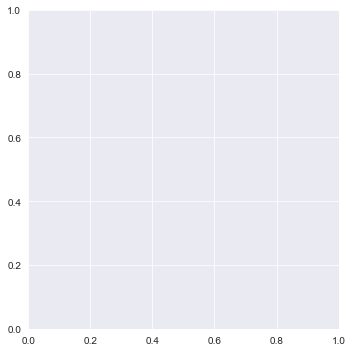

In [97]:
sns.lmplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='TARGET',
          markers=['x','o'],
          fit_reg=False,data=application)
plt.ticklabel_format(style='plain', axis='both')
plt.xlim(0,1000000)
plt.show()

In [365]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [366]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.430","17,145.000","17,145.000",0.000,"17,145.000",SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,"365,243.000",-42.000,300.000,-42.000,-37.000,0.000
1,2802425,108129,Cash loans,"25,188.615","607,500.000","679,671.000",nan,"607,500.000",THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,"365,243.000",-134.000,916.000,"365,243.000","365,243.000",1.000
2,2523466,122040,Cash loans,"15,060.735","112,500.000","136,444.500",nan,"112,500.000",TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,"365,243.000",-271.000,59.000,"365,243.000","365,243.000",1.000
3,2819243,176158,Cash loans,"47,041.335","450,000.000","470,790.000",nan,"450,000.000",MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,"365,243.000",-482.000,-152.000,-182.000,-177.000,1.000
4,1784265,202054,Cash loans,"31,924.395","337,500.000","404,055.000",nan,"337,500.000",THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
5,1383531,199383,Cash loans,"23,703.930","315,000.000","340,573.500",nan,"315,000.000",SATURDAY,8,Y,1,nan,nan,nan,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.000,low_normal,Cash X-Sell: low,"365,243.000",-654.000,-144.000,-144.000,-137.000,1.000
6,2315218,175704,Cash loans,nan,0.000,0.000,nan,nan,TUESDAY,11,Y,1,nan,nan,nan,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.000,0.000,nan,nan,MONDAY,7,Y,1,nan,nan,nan,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.000,0.000,nan,nan,MONDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.000,0.000,nan,nan,SATURDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan


In [367]:
previous_application['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [369]:
for col in cat:
    print(application[col].value_counts(),'\n')

0    282686
1     24825
Name: TARGET, dtype: int64 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman          

0.000    257456
1.000      8208
2.000       199
3.000        58
4.000        34
6.000        20
5.000        10
8.000         5
7.000         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64 

0.000      215417
1.000       33862
2.000       14412
3.000        1717
4.000         476
5.000          64
6.000          28
8.000           7
7.000           7
261.000         1
19.000          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64 



In [370]:
application['ORGANIZATION_TYPE'].isna().sum()

0

In [371]:
application[application['ORGANIZATION_TYPE']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_bins,INCOME_BINS,Id_bins,YEARS_EMPLOYED
8,100011,0,Cash loans,F,N,Y,0,"112,500.000","1,019,610.000","33,826.500","913,500.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.019,55.066,365243,"-7,427.000",-3514,nan,1,0,0,1,0,0,NaN,2.000,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587,0.206,0.752,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,1.000,0.000,1.000,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,50-60,Low,"(100001.999, 135692.0]","1,000.666"
11,100015,0,Cash loans,F,N,Y,0,"38,419.155","148,365.000","10,678.500","135,000.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015,55.937,365243,"-5,246.000",-2512,nan,1,0,0,1,1,0,NaN,2.000,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722,0.555,0.653,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.000,0.000,0.000,0.000,"-2,396.000",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,2.000,50-60,Low,"(100001.999, 135692.0]","1,000.666"
23,100027,0,Cash loans,F,N,Y,0,"83,250.000","239,850.000","23,850.000","225,000.000",Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006,68.019,365243,"-9,012.000",-3684,nan,1,0,0,1,1,0,NaN,2.000,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,nan,0.624,0.669,0.144,0.085,0.988,0.830,0.106,0.140,0.121,0.375,0.417,0.237,0.117,0.148,0.002,0.001,0.126,0.075,0.988,0.837,0.000,0.121,0.103,0.375,0.417,0.242,0.110,0.092,0.000,0.000,0.146,0.085,0.988,0.832,0.107,0.140,0.121,0.375,0.417,0.241,0.119,0.151

In [ ]:
sns.lmplot(x='Id_bins',y='ORGANIZATION_TYPE',hue='TARGET',data=application)

In [7]:
application['AMT_CREDIT']/application['AMT_INCOME_TOTAL']*100

0        200.789
1        479.075
2        200.000
3        231.617
4        422.222
           ...  
307506   161.714
307507   374.375
307508   442.918
307509   216.437
307510   428.571
Length: 307511, dtype: float64

### Top Defaulters

In [135]:
a = application.groupby(['ORGANIZATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('DEFAULTER_RATES',ascending=False)[:10]
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,ORGANIZATION_TYPE,TOTALCOUNT,DEFAULTER_RATES
54,Transport: type 3,0.386,15.754
18,Industry: type 13,0.022,13.433
25,Industry: type 8,0.008,12.500
38,Restaurant,0.589,11.706
7,Construction,2.186,11.680
6,Cleaning,0.085,11.154
14,Industry: type 1,0.338,11.068
20,Industry: type 3,1.066,10.616
36,Realtor,0.129,10.606
1,Agriculture,0.798,10.473


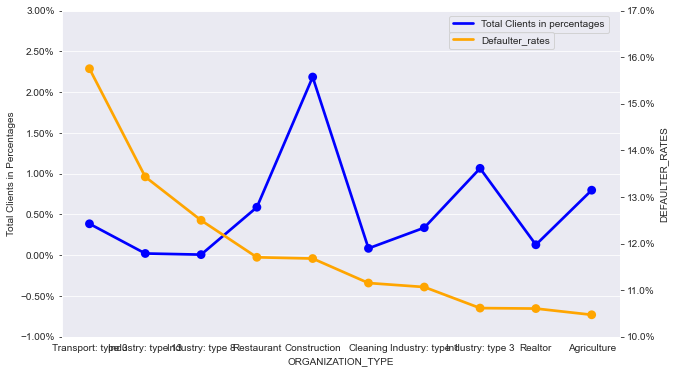

In [138]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='ORGANIZATION_TYPE',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(-1,3))
ax2 = ax1.twinx()


sns.pointplot(x='ORGANIZATION_TYPE',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(10,17))
ax2.grid(None)

plt.show()

## Highest Count

In [10]:
a = application.groupby(['ORGANIZATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('TOTALCOUNT',ascending=False)[:10]
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,ORGANIZATION_TYPE,TOTALCOUNT,DEFAULTER_RATES
5,Business Entity Type 3,22.110,9.300
57,XNA,18.007,5.400
42,Self-employed,12.491,10.174
33,Other,5.425,7.643
30,Medicine,3.640,6.584
4,Business Entity Type 2,3.432,8.528
11,Government,3.383,6.978
39,School,2.892,5.915
51,Trade: type 7,2.547,9.450
28,Kindergarten,2.237,7.035


In [14]:
# drop xna
a.drop(57,inplace=True)

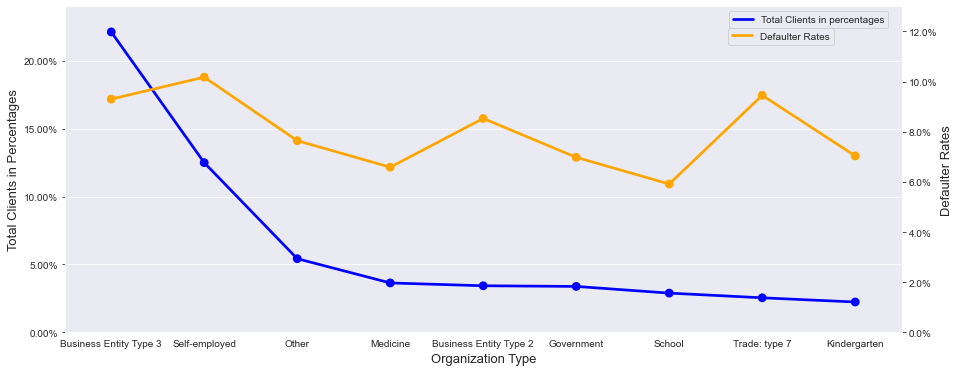

In [24]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='ORGANIZATION_TYPE',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,24))
plt.ylabel('Total Clients in Percentages',size=13)
plt.xlabel('Organization Type',size=13)
ax2 = ax1.twinx()


sns.pointplot(x='ORGANIZATION_TYPE',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter Rates'],bbox_to_anchor=(0.9253,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
plt.ylabel('Defaulter Rates',size=13)
ax2.set(ylim=(0,13))
ax2.grid(None)

plt.show()

## Occupation Type

In [7]:
a = application.groupby(['OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('TOTALCOUNT',ascending=False)
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,OCCUPATION_TYPE,TOTALCOUNT,DEFAULTER_RATES
8,Laborers,17.946,10.579
14,Sales staff,10.439,9.632
3,Core staff,8.966,6.304
10,Managers,6.950,6.214
4,Drivers,6.050,11.326
6,High skill tech staff,3.701,6.160
0,Accountants,3.191,4.830
11,Medicine staff,2.776,6.700
16,Security staff,2.186,10.742
2,Cooking staff,1.934,10.444


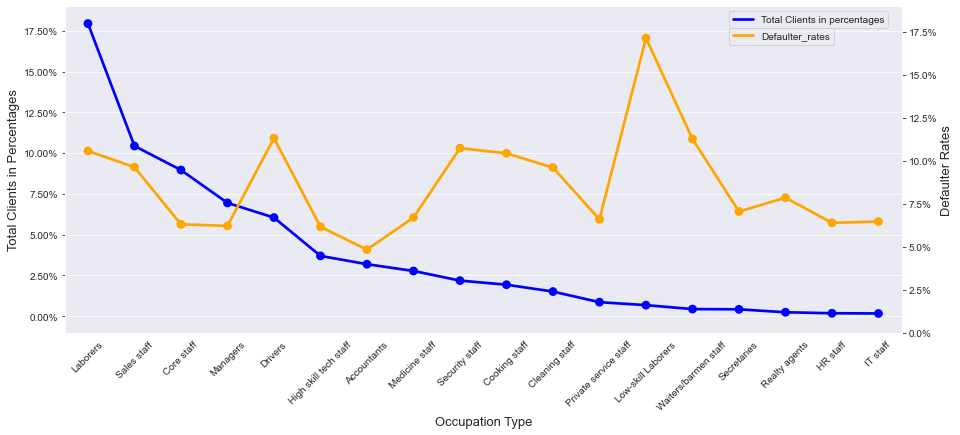

In [8]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='OCCUPATION_TYPE',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(-1,19))
plt.ylabel('Total Clients in Percentages',size=13)
plt.xlabel('Occupation Type',size=13)
ax2 = ax1.twinx()


sns.pointplot(x='OCCUPATION_TYPE',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9253,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,19))
ax1.set_xticklabels(a['OCCUPATION_TYPE'],rotation=45)
plt.ylabel('Defaulter Rates',size=13)
plt.xlabel('Occupation Type',size=13)
ax2.grid(None)

plt.show()

## Education Type

In [158]:
a = application.groupby(['NAME_EDUCATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'})
a['TOTALCOUNT'] = a_level1
a.reset_index(inplace=True)
a = a.sort_values('DEFAULTER_RATES',ascending=False)
a['TOTALCOUNT'] = a['TOTALCOUNT']/len(application)*100
a

,NAME_EDUCATION_TYPE,TOTALCOUNT,DEFAULTER_RATES
3,Lower secondary,1.241,10.928
4,Secondary / secondary special,71.019,8.940
2,Incomplete higher,3.342,8.485
1,Higher education,24.345,5.355
0,Academic degree,0.053,1.829


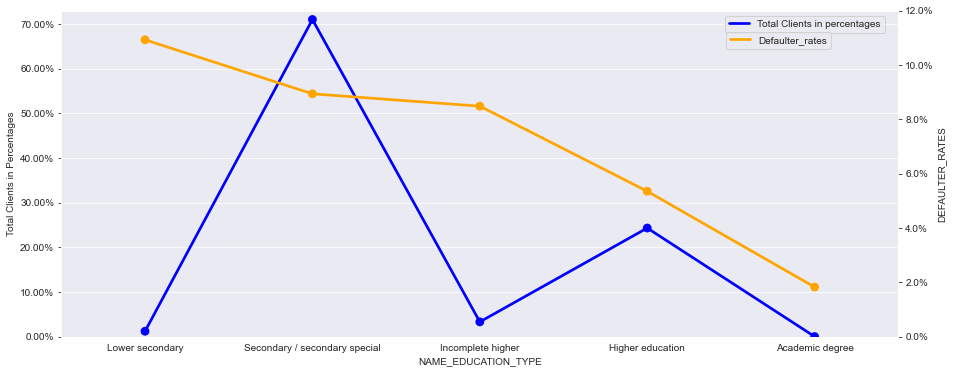

In [163]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='NAME_EDUCATION_TYPE',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,73))
ax2 = ax1.twinx()


sns.pointplot(x='NAME_EDUCATION_TYPE',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9253,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,12))
ax1.set_xticklabels(a['NAME_EDUCATION_TYPE'])
ax2.grid(None)

plt.show()